a good source:  
https://discourse.pymc.io/t/advance-bayesian-modelling-with-pymc3/1439

In [41]:
import pymc3 as pm
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.special import comb
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### flip a coin, stop when you have 5 heads

rvs means random variates

In [3]:
p = 0.5
flips = []
# do this experiment 1000 times
for i in range(1000):
    flip_sq = st.bernoulli.rvs(p, size=5)
#     print(f'flip gets {flip_sq}')
    while flip_sq.sum() !=5:
        flip_sq = np.append(flip_sq, st.bernoulli.rvs(p))
#     print(len(flip_sq))
    flips.append(len(flip_sq))

In [7]:
st.bernoulli.rvs??

(array([210., 309., 280., 124.,  57.,  10.,   5.,   3.,   1.,   1.]),
 array([ 5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. ]),
 <a list of 10 Patch objects>)

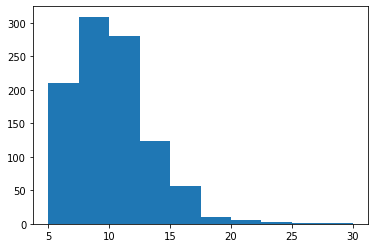

In [4]:
plt.hist(flips)

In [8]:
st.bernoulli.rvs(p, size=10)

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [13]:
st.norm.ppf??

In [14]:
st.norm.pdf??

ppf: percent point function. this is the inerse of cdf

pdf: probability density function

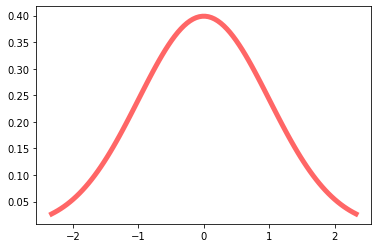

In [9]:
x = np.linspace(st.norm.ppf(0.01),
                st.norm.ppf(0.99), 100)
f, ax = plt.subplots()
ax.plot(x, st.norm.pdf(x),
       'r-', lw=5, alpha=.6, label='norm pdf')

In [15]:
x;len(x)

array([-2.32634787, -2.27935095, -2.23235402, -2.18535709, -2.13836017,
       -2.09136324, -2.04436631, -1.99736939, -1.95037246, -1.90337553,
       -1.85637861, -1.80938168, -1.76238475, -1.71538783, -1.6683909 ,
       -1.62139397, -1.57439705, -1.52740012, -1.48040319, -1.43340627,
       -1.38640934, -1.33941241, -1.29241549, -1.24541856, -1.19842163,
       -1.15142471, -1.10442778, -1.05743085, -1.01043393, -0.963437  ,
       -0.91644007, -0.86944314, -0.82244622, -0.77544929, -0.72845236,
       -0.68145544, -0.63445851, -0.58746158, -0.54046466, -0.49346773,
       -0.4464708 , -0.39947388, -0.35247695, -0.30548002, -0.2584831 ,
       -0.21148617, -0.16448924, -0.11749232, -0.07049539, -0.02349846,
        0.02349846,  0.07049539,  0.11749232,  0.16448924,  0.21148617,
        0.2584831 ,  0.30548002,  0.35247695,  0.39947388,  0.4464708 ,
        0.49346773,  0.54046466,  0.58746158,  0.63445851,  0.68145544,
        0.72845236,  0.77544929,  0.82244622,  0.86944314,  0.91

100

(array([  2.,  15.,  37., 118., 228., 236., 218., 108.,  28.,  10.]),
 array([-3.59703336, -2.93083124, -2.26462912, -1.598427  , -0.93222488,
        -0.26602276,  0.40017936,  1.06638148,  1.7325836 ,  2.39878572,
         3.06498784]),
 <a list of 10 Patch objects>)

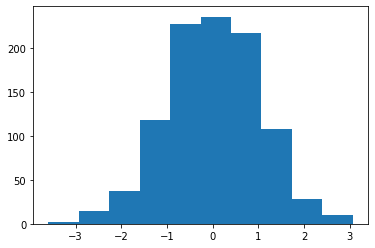

In [42]:
r = st.norm.rvs(size=1000)
plt.hist(r)

In [44]:
r[:10]

array([ 0.20150189,  0.2718786 ,  0.90350611, -0.77364252, -0.29463555,
       -0.38978597, -0.07416038,  1.64901889,  0.21169287, -0.30050536])

### use pymc3 distribution without a model: dist method

    n is the number of bernoulli trials, p is the probability of success, y describes how many successes.

In [28]:
y = pm.Binomial.dist(n=100, p=0.5)
y

y.random(size=30)

y.logp(40).eval() # what is this?

# np.exp(-1.5843639)
# np.log(np.exp(-1.5843639))

array([55, 52, 42, 46, 51, 51, 48, 47, 48, 49, 41, 50, 54, 52, 48, 46, 49,
       49, 51, 44, 48, 53, 40, 55, 57, 43, 49, 50, 55, 45])

array(-4.52415649)

In [38]:
y.random(size=1)

array(44)

In [39]:
# y = pm.Bernoulli.dist(p=0.3)
y = pm.Bernoulli.dist(p=0.3, shape=(2,3))

In [40]:
y.random(size=2)

array([[[0, 0, 0],
        [0, 0, 1]],

       [[1, 1, 1],
        [0, 0, 0]]])

(array([ 11.,  24.,  73., 153., 217., 226., 187.,  83.,  21.,   5.]),
 array([-1.099837  , -0.48517096,  0.12949508,  0.74416111,  1.35882715,
         1.97349319,  2.58815923,  3.20282527,  3.81749131,  4.43215735,
         5.04682339]),
 <a list of 10 Patch objects>)

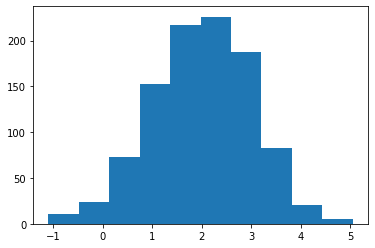

In [21]:
y = pm.Normal.dist(mu=2, sd=1)# shape=(2,3))

plt.hist(y.random(size=1000))

exclusivity:   
let Apobec H/notH = H/L  = 20/98
    hrd H/notH    = B/S  = 15/103
    
the question to ask is: what is the probability of seeing 0 H/B combination if you toss the two coins 118 time?

### priors

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


starting sampling


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p1]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:12<00:00, 3327.29draws/s]


<Figure size 504x504 with 0 Axes>

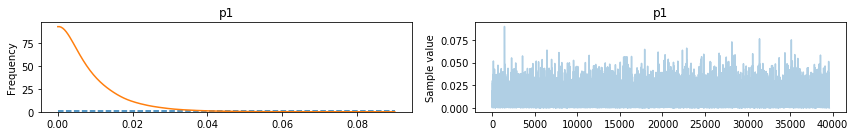

In [156]:
n=118
heads=0

with pm.Model() as model:
    p1 = pm.Uniform('p1', lower=0, upper=0.5) # non-informative prior
    y1 = pm.Binomial('y1', n=n, p=p1, observed=heads)
    print('starting sampling')
    trace = pm.sample(10000)

plt.figure(figsize=(7, 7))
pm.traceplot(trace[100:], 
          combined=True, 
          priors=[pm.Uniform.dist(0,1)])


plt.tight_layout();

In [157]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p1,0.00828,0.008195,0.000066,2.599392e-07,0.024768,16006.128902,1.000027


### model the exclusivity as bernoulli events. 

In [129]:
a = 20/118
b = 15/118
p = a * b
p

0.021545532892846882

In [130]:
y = pm.Binomial.dist(n=118, p=p)
y.random(size=100)
logp = y.logp(0).eval()
np.exp(logp)

array([3, 7, 1, 5, 1, 3, 3, 0, 3, 2, 4, 6, 2, 2, 2, 1, 3, 1, 5, 5, 3, 3,
       1, 2, 4, 1, 6, 2, 1, 2, 1, 4, 2, 2, 0, 1, 3, 3, 4, 4, 4, 1, 4, 3,
       5, 0, 3, 6, 3, 3, 2, 2, 2, 2, 0, 4, 3, 3, 2, 4, 0, 7, 5, 2, 3, 2,
       3, 1, 6, 3, 3, 7, 4, 2, 2, 2, 2, 1, 4, 2, 1, 1, 4, 1, 5, 1, 4, 5,
       2, 1, 2, 3, 4, 1, 1, 4, 2, 2, 4, 2])

0.07652321367264624

### example binomial probability mass function:

$f(x|n,p)  = \binom{n}{k} p^x  (1-p)^{n-x} = \frac{n!}{k!(n-k)!} p^x  (1-p)^{n-x}$


In [172]:
n=118
p1= 20/118.0
pmfs = []
for i in range(118):
    k=i
    p = comb(n,k,exact=True)*p1**k * (1-p1)**(n-k)
    pmfs.append(p)

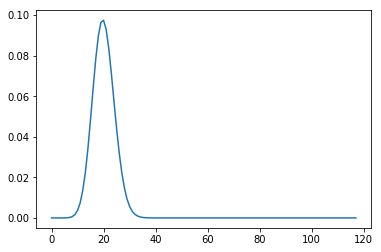

In [173]:
plt.plot(range(118), pmfs)

In [175]:
n=118
p1= 20/118.0
k=20
comb(n,k,exact=True)*p1**k * (1-p1)**(n-k)

0.09746552619758393

### the other way to look at this

In [176]:
# apobec 
p1 = 20/118.0
p1
y1 = pm.Bernoulli.dist(p=p1)
y1.random(size=100)


0.1694915254237288

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [159]:
p2 = 15/118.0
p2
y2 = pm.Bernoulli.dist(p=p2)
y2.random(size=100)

0.1271186440677966

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [160]:
# simulate for 1000 times
trials = []
for i in range(10000):
    s1 = y1.random(size=118)
    s2 = y2.random(size=118)
    num_suc = (s1 + s2 == 2).sum()
    trials.append(num_suc)

(array([ 746., 1978., 2549., 2165., 1396.,  686.,  328.,  116.,   27.,
           9.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

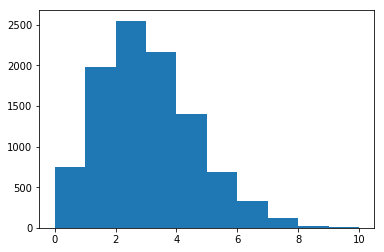

In [161]:
plt.hist(trials)

In [162]:
(np.array(trials) == 0).mean()

0.0746